In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
#deck/num/side
data=df.copy()
data['deck'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[0])
data['num'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[1])
data['side'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[2])
data['group'] = data['PassengerId'].apply(lambda x: x.split('_')[0])
data['numberingroup'] = data['PassengerId'].apply(lambda x: x.split('_')[1])
data = data.drop(['Name'], axis = 'columns')
df1 = data.copy()
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,group,numberingroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,9280,01


In [4]:
data = df1.copy()
for i in data.columns:
    data[i+'nan'] = np.where(data[i].isnull(), 1, 0)
    
df1 = data.copy()

In [5]:
df1.isnull().sum()

PassengerId           0
HomePlanet          201
CryoSleep           217
Cabin               199
Destination         182
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                199
num                 199
side                199
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [6]:
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,FoodCourtnan,ShoppingMallnan,Spanan,VRDecknan,Transportednan,decknan,numnan,sidenan,groupnan,numberingroupnan
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# EDA & FEATURE ENGINEERING

By common sense, people with the same group (by data description, they're often family members) usually be in the same cabin, from the same Home Planet, and have the same destination. 
To ensure this idea, we can check by grouping people in the same group.

In [7]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

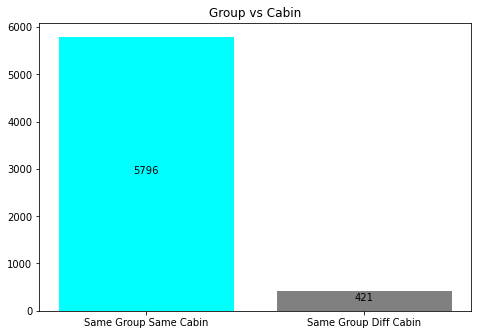

In [8]:
data = df1.copy()
                
data_grouping = data.groupby(['group']).agg({'Cabin': lambda x: x.nunique()})

diff_cabin = 0
same_cabin = 0


for i in data_grouping['Cabin']:
    if i>1:
        diff_cabin += 1
    else:
        same_cabin += 1

x = ['Same Group Same Cabin', 'Same Group Diff Cabin']
y = [same_cabin,diff_cabin]
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y,color=(['cyan', 'grey']))
addlabels(x,y)
plt.title("Group vs Cabin")
plt.show()

From the plot bar above, we can clearly see that people in the same Group often have the same Cabin.

From what we got, we can fill a person with null value in Cabin to have the same Cabin value as another person in the same Group. For they who got group that has different Cabin, we can fill the null value with the mode value.

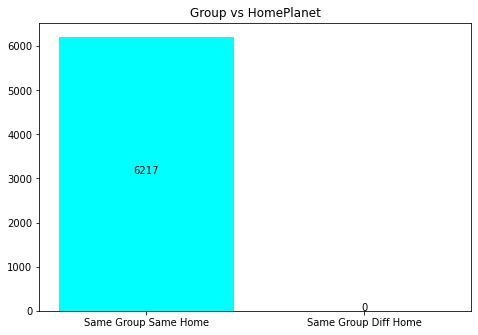

In [9]:
data = df1.copy()
                
data_grouping = data.groupby(['group']).agg({'HomePlanet': lambda x: x.nunique()})

diff_home = 0
same_home = 0


for i in data_grouping['HomePlanet']:
    if i>1:
        diff_home += 1
    else:
        same_home += 1

x = ['Same Group Same Home', 'Same Group Diff Home']
y = [same_home,diff_home]
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color=(['cyan', 'grey']))
addlabels(x,y)
plt.title("Group vs HomePlanet")
plt.show()

From the plot bar above, we can see that people in the same group always have the same homeplanet (almost like Cabin that we got before).

So we can handle the null value like how we handle the null value on Cabin.

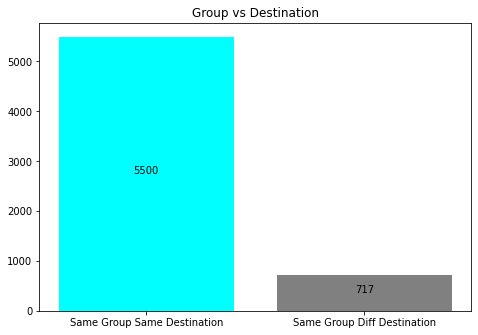

In [10]:
data = df1.copy()
                
data_grouping = data.groupby(['group']).agg({'Destination': lambda x: x.nunique()})

diff_destination = 0
same_destination = 0


for i in data_grouping['Destination']:
    if i>1:
        diff_destination += 1
    else:
        same_destination += 1

x = ['Same Group Same Destination', 'Same Group Diff Destination']
y = [same_destination,diff_destination]
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color=(['cyan', 'grey']))
addlabels(x,y)
plt.title("Group vs Destination")
plt.show()

From the plot bar above, we can see that people in the same group often have the same destination (like Cabin and HomePlanet that we got before).

So we can handle the null value like how we handle the null value on Cabin and HomePlanet.

In [11]:
data = df1.copy()

for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['Cabin'][j])):
                try:
                    data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
                except:
                    pass
                
for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['HomePlanet'][j])):
                try:
                    data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
                except:
                    pass
                
for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['Destination'][j])):
                try:
                    data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
                except:
                    pass
                
                
df2 = data.copy()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3835673790.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [12]:
df2.isnull().sum()

PassengerId           0
HomePlanet          111
CryoSleep           217
Cabin                99
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                199
num                 199
side                199
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [13]:
data = df2.copy()
data['deck'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[0])
data['num'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[1])
data['side'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[2])
data = data.drop(['Cabin'], axis = 'columns')
df3 = data.copy()

In [14]:
df3

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,FoodCourtnan,ShoppingMallnan,Spanan,VRDecknan,Transportednan,decknan,numnan,sidenan,groupnan,numberingroupnan
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,0,0,0,0,0,0,0,0,0,0


Take an attention to all things below

In [15]:
df3.isnull().sum()

PassengerId           0
HomePlanet          111
CryoSleep           217
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                 99
num                  99
side                 99
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [16]:
df3['deck'].value_counts()

F    2810
G    2588
E     885
B     796
C     761
D     487
A     262
T       5
Name: deck, dtype: int64

In [17]:
df3['side'].value_counts()

S    4343
P    4251
Name: side, dtype: int64

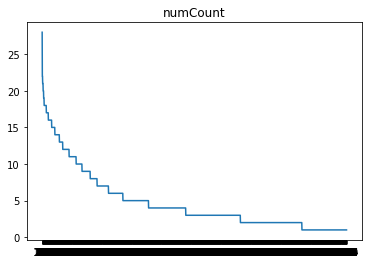

In [18]:
plt.title('numCount')
plt.plot(df3['num'].value_counts())

From the last 4 things above, we can see that deck F become the most filled deck. Then we can fill the rest null value in 'deck' with F value

Side S become the most filled side, but if we fill the side null value with S, it means that the spaceship will not balanced (number of people in S and P side is not equal). We also can see that the difference between number of people in S and P side almost equal to number of null 'side' value. Then, we can fill the null value with P so both of side has almost equal value (make the spaceship 'more balanced').

For 'num' value, we cannot conclude anything because it's too random. So we need to find another approach

Let's check value of 'num' when deck is equal to 'F' and side is equal to 'P' (Like what we filled into our deck and side null values)

In [19]:
dfdeckside_F_P = df3[(df3['deck'] == 'F') & (df3['side']=='P')]
dfdeckside_F_P['num'].value_counts()

1194    8
1808    7
1411    7
859     6
856     6
       ..
684     1
686     1
687     1
690     1
1894    1
Name: num, Length: 1218, dtype: int64

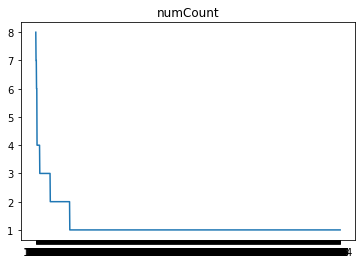

In [20]:
plt.title('numCount')
plt.plot(dfdeckside_F_P['num'].value_counts())

We can see that majority the unique num value occur when deck is equal to 'F' and side is equal to 'P' is only one.

Then method that we can use is grouping every people number value that has F deck and P side and appear less than 2 times in the data (become a list). Then we're gonna fill the num value with the last 99 values from the list.

In [21]:
arrnum=[]
for i,j in (df3[(df3['deck'] == 'F') & (df3['side']=='P')]['num'].value_counts()<2).iteritems():
    if(j==True):
        arrnum.append(i)

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2286590936.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in (df3[(df3['deck'] == 'F') & (df3['side']=='P')]['num'].value_counts()<2).iteritems():


### Filling remaining Cabin null value (deck, side, num)

In [22]:
index = 0
data = df3.copy()
for i,j in data['deck'].iteritems():
    if(pd.isnull(j)):
        data['deck'][i] = 'F'
        data['side'][i] = 'P'
        data['num'][i] = arrnum[:][index]
        index+=1

data.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3158777078.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['deck'].iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3158777078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['deck'][i] = 'F'
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3158777078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['side'][i] = 'P'
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3158777078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

PassengerId           0
HomePlanet          111
CryoSleep           217
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [23]:
df4 = data.copy()

### Filling Missing HomePlanet

<AxesSubplot: >

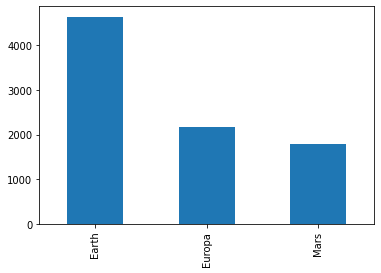

In [24]:
data = df4.copy()

data['HomePlanet'].value_counts().plot.bar()

We can see that 'Earth' is the most destination in the spaceship. So we can fill the rest of the null value with 'Earth'

In [25]:
for i,j in data['HomePlanet'].iteritems():
    if(pd.isnull(j)):
        data['HomePlanet'][i] = 'Earth'

df5 = data.copy()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2726132647.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['HomePlanet'].iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2726132647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HomePlanet'][i] = 'Earth'


In [26]:
df5.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep           217
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

### Filling Missing CryoSleep

By common sense we can conclude that someone who is in CryoSleep (put into suspended animation) must not has billed at spaceship's amenities.

In [27]:
data = df5.copy()

data[(data['RoomService'] == 0.0) & (data['FoodCourt'] == 0.0) & (data['ShoppingMall'] == 0.0) & (data['Spa'] == 0.0) & (data['VRDeck'] == 0.0) & (pd.isnull(data['CryoSleep']))]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,FoodCourtnan,ShoppingMallnan,Spanan,VRDecknan,Transportednan,decknan,numnan,sidenan,groupnan,numberingroupnan
92,0099_02,Earth,NaN,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
175,0198_01,Earth,NaN,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
266,0290_03,Europa,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
392,0433_01,Europa,NaN,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
626,0653_01,Mars,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,9076_01,Earth,NaN,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8612,9193_01,Earth,NaN,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8620,9197_01,Europa,NaN,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8651,9227_05,Earth,NaN,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


There are 87 dataset that has null value in CryoSleep data and has 0 billed in every spaceship's amenities

In [28]:
data = df5.copy()

for i, j in (data[(data['RoomService'] == 0.0) & (data['FoodCourt'] == 0.0) & (data['ShoppingMall'] == 0.0) & (data['Spa'] == 0.0) & (data['VRDeck'] == 0.0) & (pd.isnull(data['CryoSleep']))]['CryoSleep']).iteritems():
    data['CryoSleep'][i] = True

data.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\716475807.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, j in (data[(data['RoomService'] == 0.0) & (data['FoodCourt'] == 0.0) & (data['ShoppingMall'] == 0.0) & (data['Spa'] == 0.0) & (data['VRDeck'] == 0.0) & (pd.isnull(data['CryoSleep']))]['CryoSleep']).iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\716475807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'][i] = True


PassengerId           0
HomePlanet            0
CryoSleep           130
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [29]:
df6 = data.copy()

We're gonna grouping every unique deck to see what's the most CryoSleep's value for each deck

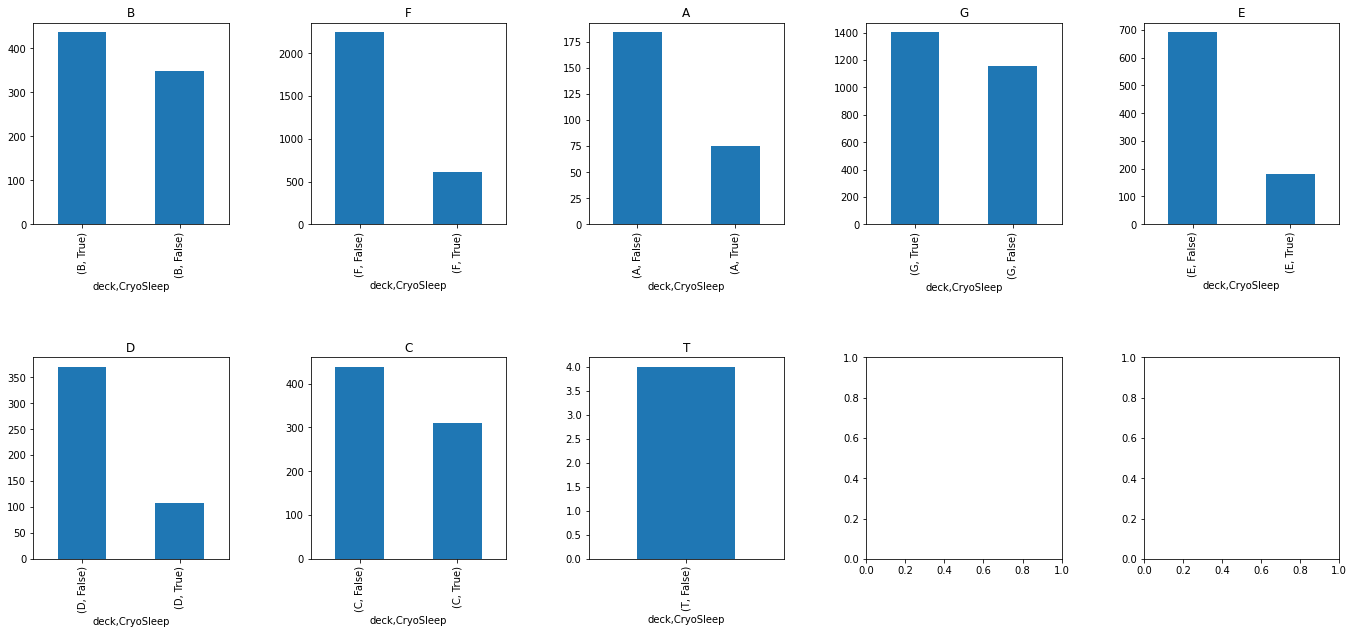

In [30]:
data = df6.copy()

fig, axes = plt.subplots(2, 5, figsize = (20,10))

x_cryo = 0
y_cryo = 0
# plt.tight_layout(pad=5)

for i in data['deck'].unique():
    data.groupby(data[data['deck'] == i]['deck'])['CryoSleep'].value_counts().plot.bar(ax=axes[x_cryo,y_cryo])
    axes[x_cryo,y_cryo].set_title(i)
    if(y_cryo == 4):
        y_cryo = 0
        x_cryo +=1
    else:
        y_cryo += 1
    plt.tight_layout(pad=5)
#     plt.show()

From the graph above, we can fill the rest of null value in CryoSleep depends on what's the mode CryoSleep value against it's deck

In [31]:
data = df6.copy()

for i,j in data['CryoSleep'].iteritems():
    if(pd.isnull(j)):
        data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
        
data.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['CryoSleep'].iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
C:\Users\COM

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\3184182207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination         103
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [32]:
df7 = data.copy()

### Fill Destination Value

<AxesSubplot: >

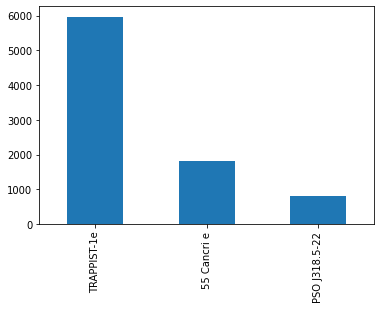

In [33]:
data = df7.copy()

data['Destination'].value_counts().plot.bar()

We can see from the graph above that destination 'TRAPPIST-1e' occur much more than '55 Cancri e' and 'PSO J318.5-22'.
So we can fill the rest of destination null value with 'TRAPPIST-1e'

In [34]:
data = df7.copy()

for i,j in data['Destination'].iteritems():
    if(pd.isnull(j)):
        data['Destination'][i] = 'TRAPPIST-1e'

data.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2766142089.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['Destination'].iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2766142089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Destination'][i] = 'TRAPPIST-1e'


PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [35]:
df8 = data.copy()

### Fill VIP Value

<AxesSubplot: >

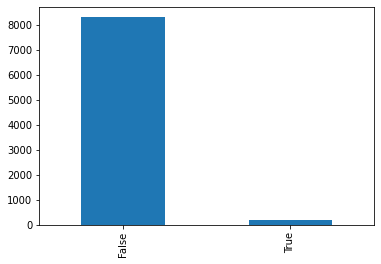

In [36]:
data = df8.copy()

data['VIP'].value_counts().plot.bar()

We can see from the graph above that False value has much more occur rather than True Value.
So we can fill the rest of null value with False value

In [37]:
data = df8.copy()

for i,j in data['VIP'].iteritems():
    if(pd.isnull(j)):
        data['VIP'][i] = False

data.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\1893715218.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['VIP'].iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\1893715218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIP'][i] = False


PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                 179
VIP                   0
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [38]:
df9 = data.copy()

### FIll Age, RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck (numerical value)

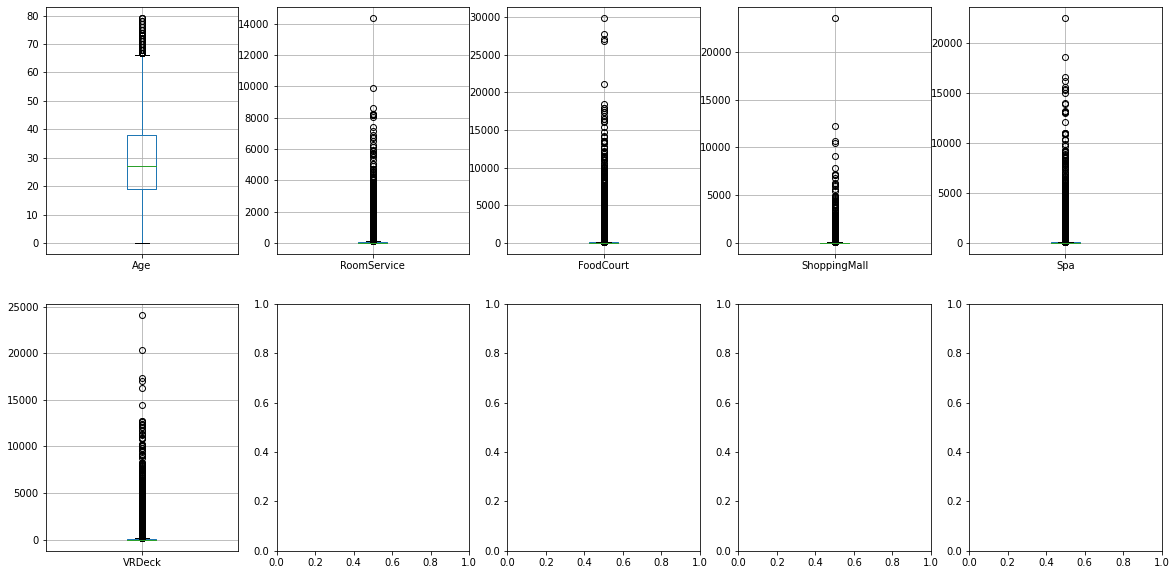

In [39]:
data = df9.copy()

fig, axes = plt.subplots(2, 5, figsize = (20,10))

x_boxplot = 0
y_boxplot = 0

feature = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in feature:
    data[[i]].boxplot(ax=axes[x_boxplot, y_boxplot])
    if(y_boxplot == 4):
        y_boxplot = 0
        x_boxplot +=1
    else:
        y_boxplot += 1

In [40]:
df10 = df9.copy()

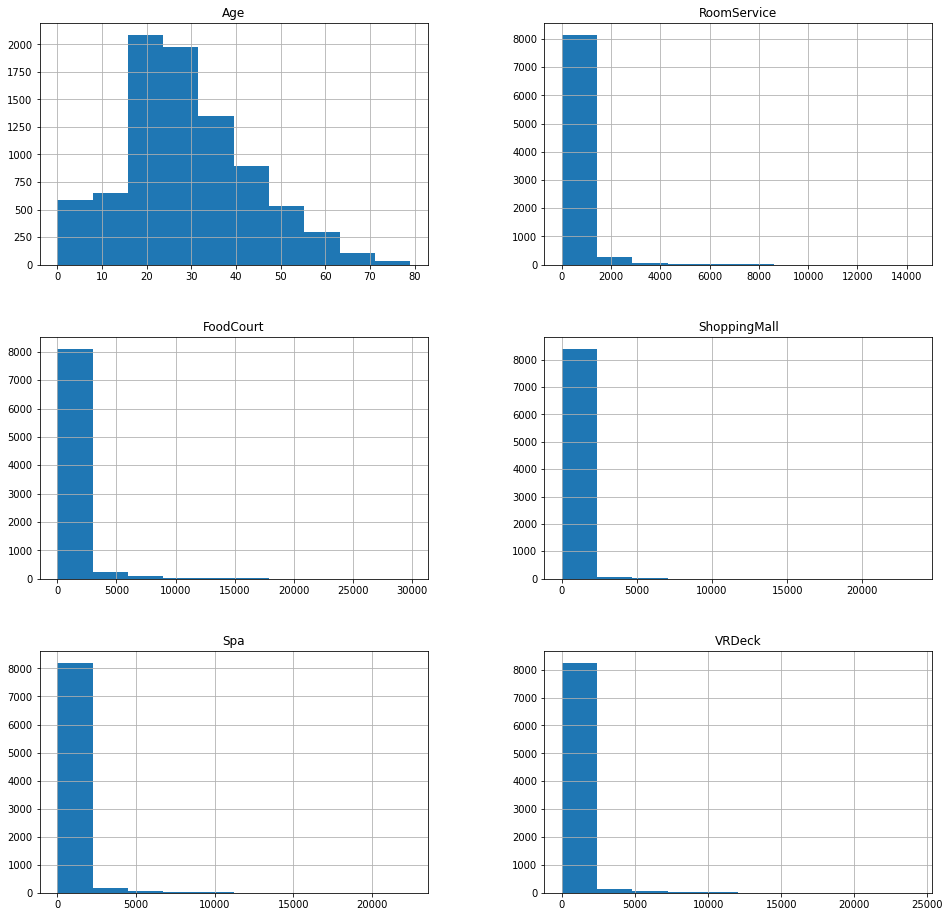

In [41]:
data = df10.copy()


feature = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

data[feature].hist(figsize=(16,16))

df11 = data.copy()

From the plots above, we can see that the data most likely has skewed shape and have many outliers.
But did we actually need drop outliers (especially for 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck')?

People that spend much money on spaceship's amenities is not wrong, even it could actually be valuable datas.

So we doesn't need to filter the outliers.

In [42]:
df11.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                 179
VIP                   0
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

Remember that we conclude that everyone in CryoSleep must not spend any money (billed = 0), and it also happens vice versa.

In [43]:
data = df11.copy()

for i, j in (data[(data['CryoSleep'] == True) & ((pd.isnull(data['RoomService'])) | (pd.isnull(data['FoodCourt'])) | (pd.isnull(data['ShoppingMall'])) | (pd.isnull(data['Spa'])) | (pd.isnull(data['VRDeck'])))]['CryoSleep']).iteritems():
    data['RoomService'][i] = 0.0
    data['FoodCourt'][i] = 0.0
    data['ShoppingMall'][i] = 0.0
    data['Spa'][i] = 0.0
    data['VRDeck'][i] = 0.0


df12 = data.copy()

df12.isnull().sum()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2125267766.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, j in (data[(data['CryoSleep'] == True) & ((pd.isnull(data['RoomService'])) | (pd.isnull(data['FoodCourt'])) | (pd.isnull(data['ShoppingMall'])) | (pd.isnull(data['Spa'])) | (pd.isnull(data['VRDeck'])))]['CryoSleep']).iteritems():
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2125267766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RoomService'][i] = 0.0
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_27552\2125267766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                 179
VIP                   0
RoomService         112
FoodCourt           112
ShoppingMall        109
Spa                 115
VRDeck              122
Transported           0
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
Transportednan        0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

For the remaining null data, we can fill them with median value.

In [44]:
data = df12.copy()

data["Age"].fillna(round(data['Age'].median()), inplace = True)
data["RoomService"].fillna(data['RoomService'].median(), inplace = True)
data["FoodCourt"].fillna(data['FoodCourt'].median(), inplace = True)
data["ShoppingMall"].fillna(data['ShoppingMall'].median(), inplace = True)
data["Spa"].fillna(data['Spa'].median(), inplace = True)
data["VRDeck"].fillna(data['VRDeck'].median(), inplace = True)

data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
deck                0
num                 0
side                0
group               0
numberingroup       0
PassengerIdnan      0
HomePlanetnan       0
CryoSleepnan        0
Cabinnan            0
Destinationnan      0
Agenan              0
VIPnan              0
RoomServicenan      0
FoodCourtnan        0
ShoppingMallnan     0
Spanan              0
VRDecknan           0
Transportednan      0
decknan             0
numnan              0
sidenan             0
groupnan            0
numberingroupnan    0
dtype: int64

In [45]:
df13 = data.copy()

In [46]:
data = df13.copy()

data.dtypes

PassengerId          object
HomePlanet           object
CryoSleep            object
Destination          object
Age                 float64
VIP                  object
RoomService         float64
FoodCourt           float64
ShoppingMall        float64
Spa                 float64
VRDeck              float64
Transported            bool
deck                 object
num                  object
side                 object
group                object
numberingroup        object
PassengerIdnan        int32
HomePlanetnan         int32
CryoSleepnan          int32
Cabinnan              int32
Destinationnan        int32
Agenan                int32
VIPnan                int32
RoomServicenan        int32
FoodCourtnan          int32
ShoppingMallnan       int32
Spanan                int32
VRDecknan             int32
Transportednan        int32
decknan               int32
numnan                int32
sidenan               int32
groupnan              int32
numberingroupnan      int32
dtype: object

We need to change 'num' data type from 'object' to 'float'.

Next we need to drop a few features that unnecessary for modelling, i.e. PassengerId, group, numberingroup, PassengerIdnan, groupnan, numberingroupnan 

In [47]:
data = df13.copy()

data['num'] = data['num'].astype(str).astype(float)

data.drop(['PassengerId', 'group', 'numberingroup', 'PassengerIdnan', 'groupnan', 'numberingroupnan', 'Transportednan'], axis='columns', inplace=True)

df14 = data.copy()


In [48]:
data = df14.copy()
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='object']

encoding = pd.get_dummies(data[categorical_features])
encoding

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
8689,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
8690,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
8691,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [49]:
data = df14.copy()

df15 = pd.concat([data, encoding], axis = 'columns').drop(categorical_features, axis='columns')

df15

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,HomePlanetnan,CryoSleepnan,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1.0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,98.0,0,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1499.0,0,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1500.0,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,608.0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Modeling & Train the Data

In [50]:
X = df15.drop(['Transported'], axis='columns')
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,HomePlanetnan,CryoSleepnan,Cabinnan,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,98.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1499.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1500.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
y = df15['Transported']
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [52]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 27,
                     classifiers = 'all')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y,random_state=27)

models, predictions = clf.fit((X_train),(X_test) ,y_train , y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.22it/s]


In [53]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.81,0.81,0.81,0.81,0.32
XGBClassifier,0.81,0.81,0.81,0.81,0.53
RandomForestClassifier,0.81,0.81,0.81,0.81,0.84
LogisticRegression,0.80,0.80,0.80,0.80,0.06
LinearSVC,0.80,0.80,0.80,0.80,0.83
CalibratedClassifierCV,0.80,0.80,0.80,0.80,5.24
AdaBoostClassifier,0.80,0.80,0.80,0.80,0.64
ExtraTreesClassifier,0.80,0.80,0.80,0.79,0.95
NuSVC,0.79,0.79,0.79,0.79,3.30


From the results, we can get accuracy for almost every possible modeling method to do classifier on our data.
We will take the best three models (LGBM, Xgboost, and RandomForest) to do hyperparameter tuning so we can get (hopefully) the best of the best model we can use to train our data.

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

lgbm = lgb.LGBMClassifier()
xgboost = xgb.XGBClassifier()
rfc = RandomForestClassifier()
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'lgbmclassifier': {
        'model': lgbm,
        'params':{
        'max_depth':[10, 15, 25, 30],
        'learning_rate': [0.01, 0.03, 0.05],
        'n_estimators': [100,300,500]
        }
    },
    'xgbclassifier': {
        'model': xgboost,
        'params':{
        'max_depth':[10, 15, 25, 30],
        'learning_rate': [0.01, 0.03, 0.05],
        'n_estimators': [100,300, 500]
        }
    },
    'randomforestclassifier': {
        'model': rfc,
        'params':{
        'max_depth':[10, 15, 25, 30],
        'min_samples_split': [2, 5, 10, 20],
        'n_estimators': [100,300, 500]
        }
    }
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
scores = []
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

for algo_name, config in hyperparameter_grid.items():
        random_cv =  RandomizedSearchCV(config['model'], config['params'], cv=skf, scoring = 'accuracy', return_train_score=True, random_state = 27)
        random_cv.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': random_cv.best_score_,
            'best_params': random_cv.best_params_
        })
        print(pd.DataFrame(scores,columns=['model','best_score','best_params']))
        print("=========")

            model  best_score  \
0  lgbmclassifier        0.81   

                                         best_params  
0  {'n_estimators': 500, 'max_depth': 15, 'learni...  
            model  best_score  \
0  lgbmclassifier        0.81   
1   xgbclassifier        0.80   

                                         best_params  
0  {'n_estimators': 500, 'max_depth': 15, 'learni...  
1  {'n_estimators': 300, 'max_depth': 15, 'learni...  
                    model  best_score  \
0          lgbmclassifier        0.81   
1           xgbclassifier        0.80   
2  randomforestclassifier        0.81   

                                         best_params  
0  {'n_estimators': 500, 'max_depth': 15, 'learni...  
1  {'n_estimators': 300, 'max_depth': 15, 'learni...  
2  {'n_estimators': 500, 'min_samples_split': 10,...  


In [56]:
scores

[{'model': 'lgbmclassifier',
  'best_score': 0.8081222691241544,
  'best_params': {'n_estimators': 500,
   'max_depth': 15,
   'learning_rate': 0.01}},
 {'model': 'xgbclassifier',
  'best_score': 0.7994941738006646,
  'best_params': {'n_estimators': 300,
   'max_depth': 15,
   'learning_rate': 0.03}},
 {'model': 'randomforestclassifier',
  'best_score': 0.805359746054602,
  'best_params': {'n_estimators': 500,
   'min_samples_split': 10,
   'max_depth': 15}}]

Implement best model to our model (LGBM)

In [57]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

reg = lgb.LGBMClassifier(  n_estimators=500,
                           max_depth=15,
                           learning_rate=0.01)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state=27)


reg.fit(X_train, y_train,
            eval_set=[((X), y), (X_test, y_test)],
            verbose=1)

[1]	valid_0's binary_logloss: 0.688566	valid_1's binary_logloss: 0.688705
[2]	valid_0's binary_logloss: 0.684102	valid_1's binary_logloss: 0.684379
[3]	valid_0's binary_logloss: 0.679739	valid_1's binary_logloss: 0.680182
[4]	valid_0's binary_logloss: 0.675447	valid_1's binary_logloss: 0.676025
[5]	valid_0's binary_logloss: 0.671251	valid_1's binary_logloss: 0.671991
[6]	valid_0's binary_logloss: 0.667134	valid_1's binary_logloss: 0.668024
[7]	valid_0's binary_logloss: 0.663097	valid_1's binary_logloss: 0.664149
[8]	valid_0's binary_logloss: 0.659129	valid_1's binary_logloss: 0.660301
[9]	valid_0's binary_logloss: 0.655219	valid_1's binary_logloss: 0.656557
[10]	valid_0's binary_logloss: 0.651398	valid_1's binary_logloss: 0.652846
[11]	valid_0's binary_logloss: 0.64765	valid_1's binary_logloss: 0.649218
[12]	valid_0's binary_logloss: 0.643941	valid_1's binary_logloss: 0.645657
[13]	valid_0's binary_logloss: 0.640327	valid_1's binary_logloss: 0.642206
[14]	valid_0's binary_logloss: 0.63

[118]	valid_0's binary_logloss: 0.448741	valid_1's binary_logloss: 0.459045
[119]	valid_0's binary_logloss: 0.447832	valid_1's binary_logloss: 0.458279
[120]	valid_0's binary_logloss: 0.44697	valid_1's binary_logloss: 0.457533
[121]	valid_0's binary_logloss: 0.446107	valid_1's binary_logloss: 0.456674
[122]	valid_0's binary_logloss: 0.445282	valid_1's binary_logloss: 0.455912
[123]	valid_0's binary_logloss: 0.444414	valid_1's binary_logloss: 0.455181
[124]	valid_0's binary_logloss: 0.443606	valid_1's binary_logloss: 0.454463
[125]	valid_0's binary_logloss: 0.442807	valid_1's binary_logloss: 0.453757
[126]	valid_0's binary_logloss: 0.442016	valid_1's binary_logloss: 0.453044
[127]	valid_0's binary_logloss: 0.441227	valid_1's binary_logloss: 0.452317
[128]	valid_0's binary_logloss: 0.440439	valid_1's binary_logloss: 0.451627
[129]	valid_0's binary_logloss: 0.439695	valid_1's binary_logloss: 0.450923
[130]	valid_0's binary_logloss: 0.438926	valid_1's binary_logloss: 0.450202
[131]	valid_0

[249]	valid_0's binary_logloss: 0.378631	valid_1's binary_logloss: 0.399716
[250]	valid_0's binary_logloss: 0.378343	valid_1's binary_logloss: 0.399583
[251]	valid_0's binary_logloss: 0.378037	valid_1's binary_logloss: 0.399402
[252]	valid_0's binary_logloss: 0.377721	valid_1's binary_logloss: 0.399183
[253]	valid_0's binary_logloss: 0.377393	valid_1's binary_logloss: 0.398911
[254]	valid_0's binary_logloss: 0.377092	valid_1's binary_logloss: 0.398715
[255]	valid_0's binary_logloss: 0.376719	valid_1's binary_logloss: 0.398387
[256]	valid_0's binary_logloss: 0.376398	valid_1's binary_logloss: 0.398121
[257]	valid_0's binary_logloss: 0.376049	valid_1's binary_logloss: 0.397899
[258]	valid_0's binary_logloss: 0.375749	valid_1's binary_logloss: 0.397698
[259]	valid_0's binary_logloss: 0.375449	valid_1's binary_logloss: 0.397478
[260]	valid_0's binary_logloss: 0.37511	valid_1's binary_logloss: 0.397263
[261]	valid_0's binary_logloss: 0.374801	valid_1's binary_logloss: 0.397077
[262]	valid_0

[374]	valid_0's binary_logloss: 0.348048	valid_1's binary_logloss: 0.38236
[375]	valid_0's binary_logloss: 0.347902	valid_1's binary_logloss: 0.382321
[376]	valid_0's binary_logloss: 0.347695	valid_1's binary_logloss: 0.382249
[377]	valid_0's binary_logloss: 0.347527	valid_1's binary_logloss: 0.382256
[378]	valid_0's binary_logloss: 0.347324	valid_1's binary_logloss: 0.382191
[379]	valid_0's binary_logloss: 0.347158	valid_1's binary_logloss: 0.382106
[380]	valid_0's binary_logloss: 0.347017	valid_1's binary_logloss: 0.382072
[381]	valid_0's binary_logloss: 0.346826	valid_1's binary_logloss: 0.381952
[382]	valid_0's binary_logloss: 0.346687	valid_1's binary_logloss: 0.38192
[383]	valid_0's binary_logloss: 0.346492	valid_1's binary_logloss: 0.381866
[384]	valid_0's binary_logloss: 0.346285	valid_1's binary_logloss: 0.381734
[385]	valid_0's binary_logloss: 0.34609	valid_1's binary_logloss: 0.381686
[386]	valid_0's binary_logloss: 0.345955	valid_1's binary_logloss: 0.381657
[387]	valid_0's

LGBMClassifier(learning_rate=0.01, max_depth=15, n_estimators=500)

In [58]:
reg.score(X_test, y_test)

0.8223116733755031

In [59]:
model = reg.fit(X, y)

# Implement to Test Data

## Basically we're doing the same thing like how we handle our train data before

In [60]:
dftest = pd.read_csv('test.csv')
dftest

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,Kitakan Conale


In [61]:
#deck/num/side
data=dftest.copy()
data['deck'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[0])
data['num'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[1])
data['side'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[2])
data['group'] = data['PassengerId'].apply(lambda x: x.split('_')[0])
data['numberingroup'] = data['PassengerId'].apply(lambda x: x.split('_')[1])
data = data.drop(['Name'], axis = 'columns')
dftest1 = data.copy()
dftest1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,group,numberingroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,G,3,S,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,F,4,S,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,C,0,S,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,C,1,S,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,F,5,S,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,G,1496,S,9266,02
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,NaN,NaN,NaN,9269,01
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,D,296,P,9271,01
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,D,297,P,9273,01


In [62]:
data = dftest1.copy()
for i in data.columns:
    data[i+'nan'] = np.where(data[i].isnull(), 1, 0)
    
dftest1 = data.copy()

In [63]:
dftest1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,RoomServicenan,FoodCourtnan,ShoppingMallnan,Spanan,VRDecknan,decknan,numnan,sidenan,groupnan,numberingroupnan
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,...,0,0,0,0,0,1,1,1,0,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data = dftest1.copy()

for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['Cabin'][j])):
                try:
                    data['Cabin'][j] = data[data['group'] == i]['Cabin'].mode()[0]
                except:
                    pass
                
for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['HomePlanet'][j])):
                try:
                    data['HomePlanet'][j] = data[data['group'] == i]['HomePlanet'].mode()[0]
                except:
                    pass
                
for i in data['group'].unique():
    if(len(data[data['group'] == i].index.values)>1):
        index = data[data['group'] == i].index.values
        for j in index:
            if(pd.isnull(data['Destination'][j])):
                try:
                    data['Destination'][j] = data[data['group'] == i]['Destination'].mode()[0]
                except:
                    pass
                
dftest2 = data.copy()

In [65]:
data = dftest2.copy()
data['deck'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[0])
data['num'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[1])
data['side'] = data[data['Cabin'].isnull()==False]['Cabin'].apply(lambda x: x.split('/')[2])
data = data.drop(['Cabin'], axis = 'columns')
dftest3 = data.copy()

In [66]:
dftest3

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,RoomServicenan,FoodCourtnan,ShoppingMallnan,Spanan,VRDecknan,decknan,numnan,sidenan,groupnan,numberingroupnan
0,0013_01,Earth,True,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0018_01,Earth,False,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,...,0,0,0,0,0,0,0,0,0,0
2,0019_01,Europa,True,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0021_01,Europa,False,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,...,0,0,0,0,0,0,0,0,0,0
4,0023_01,Earth,False,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4273,9269_01,Earth,False,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,...,0,0,0,0,0,1,1,1,0,0
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4275,9273_01,Europa,False,NaN,NaN,False,0.00,2680.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [67]:
arrnumtest=[]
for i,j in (dftest3[(dftest3['deck'] == 'F') & (dftest3['side']=='P')]['num'].value_counts()<2).iteritems():
    if(j==True):
        arrnumtest.append(i)

In [68]:
index = 0
data = dftest3.copy()
for i,j in data['deck'].iteritems():
    if(pd.isnull(j)):
        data['deck'][i] = 'F'
        data['side'][i] = 'P'
        data['num'][i] = arrnum[index]
        index+=0

data.isnull().sum()

PassengerId           0
HomePlanet           46
CryoSleep            93
Destination          51
Age                  91
VIP                  93
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [69]:
dftest4 = data.copy()

In [70]:
for i,j in data['HomePlanet'].iteritems():
    if(pd.isnull(j)):
        data['HomePlanet'][i] = 'Earth'

dftest5 = data.copy()

In [71]:
data = dftest5.copy()

for i, j in (data[(data['RoomService'] == 0.0) & (data['FoodCourt'] == 0.0) & (data['ShoppingMall'] == 0.0) & (data['Spa'] == 0.0) & (data['VRDeck'] == 0.0) & (pd.isnull(data['CryoSleep']))]['CryoSleep']).iteritems():
    data['CryoSleep'][i] = True

data.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep            57
Destination          51
Age                  91
VIP                  93
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [72]:
dftest6 = data.copy()

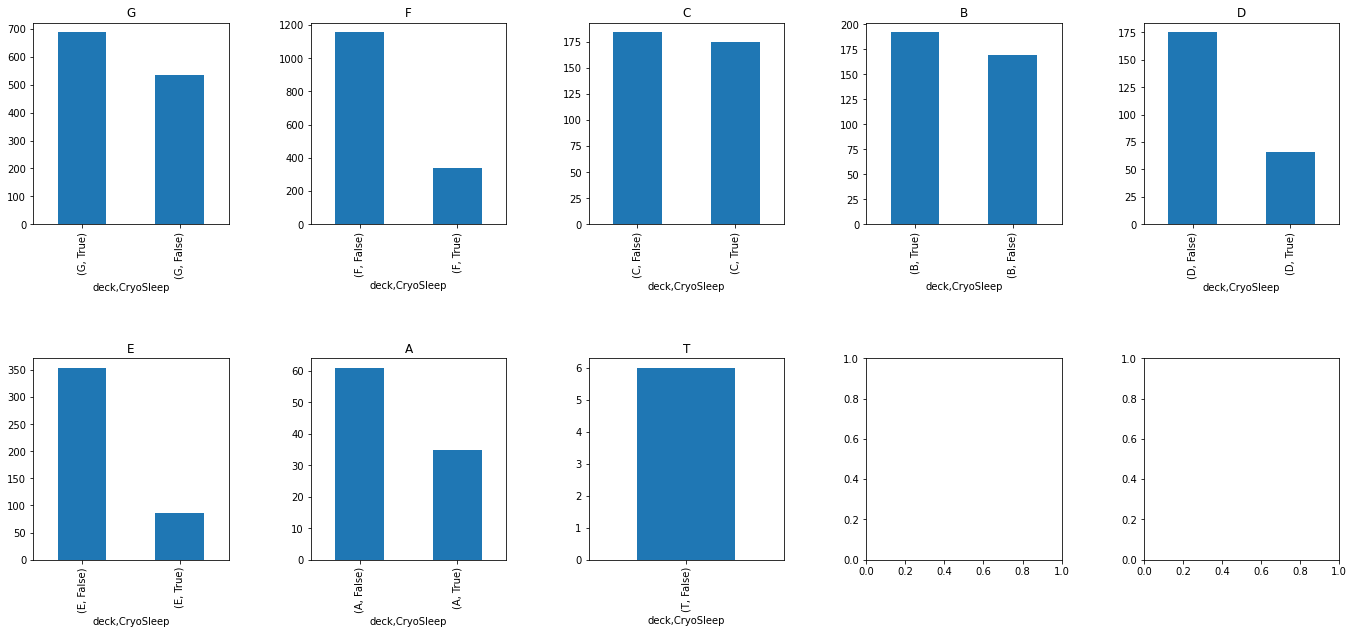

In [73]:
data = dftest6.copy()

fig, axes = plt.subplots(2, 5, figsize = (20,10))

x_cryo = 0
y_cryo = 0
# plt.tight_layout(pad=5)

for i in data['deck'].unique():
    data.groupby(data[data['deck'] == i]['deck'])['CryoSleep'].value_counts().plot.bar(ax=axes[x_cryo,y_cryo])
    axes[x_cryo,y_cryo].set_title(i)
    if(y_cryo == 4):
        y_cryo = 0
        x_cryo +=1
    else:
        y_cryo += 1
    plt.tight_layout(pad=5)

In [74]:
data['deck']

0       G
1       F
2       C
3       C
4       F
       ..
4272    G
4273    F
4274    D
4275    D
4276    G
Name: deck, Length: 4277, dtype: object

In [75]:
data = dftest6.copy()

for i,j in data['CryoSleep'].iteritems():
    if(pd.isnull(j)):
        data['CryoSleep'][i] = data[data['deck'] == data['deck'][i]]['CryoSleep'].mode()[0]
        
data.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination          51
Age                  91
VIP                  93
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [76]:
dftest7 = data.copy()

In [77]:
data = dftest7.copy()

for i,j in data['Destination'].iteritems():
    if(pd.isnull(j)):
        data['Destination'][i] = 'TRAPPIST-1e'

data.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                  91
VIP                  93
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [78]:
dftest8 = data.copy()

<AxesSubplot: >

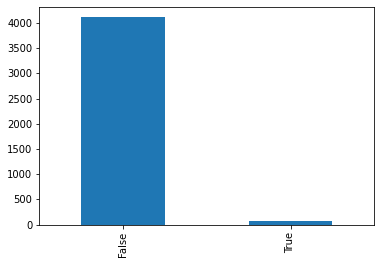

In [79]:
data = dftest8.copy()

data['VIP'].value_counts().plot.bar()

In [80]:
data = dftest8.copy()

for i,j in data['VIP'].iteritems():
    if(pd.isnull(j)):
        data['VIP'][i] = False

data.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                  91
VIP                   0
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
deck                  0
num                   0
side                  0
group                 0
numberingroup         0
PassengerIdnan        0
HomePlanetnan         0
CryoSleepnan          0
Cabinnan              0
Destinationnan        0
Agenan                0
VIPnan                0
RoomServicenan        0
FoodCourtnan          0
ShoppingMallnan       0
Spanan                0
VRDecknan             0
decknan               0
numnan                0
sidenan               0
groupnan              0
numberingroupnan      0
dtype: int64

In [81]:
dftest11 = data.copy()

In [82]:
data = dftest11.copy()

for i, j in (data[(data['CryoSleep'] == True) & ((pd.isnull(data['RoomService'])) | (pd.isnull(data['FoodCourt'])) | (pd.isnull(data['ShoppingMall'])) | (pd.isnull(data['Spa'])) | (pd.isnull(data['VRDeck'])))]['CryoSleep']).iteritems():
    data['RoomService'][i] = 0.0
    data['FoodCourt'][i] = 0.0
    data['ShoppingMall'][i] = 0.0
    data['Spa'][i] = 0.0
    data['VRDeck'][i] = 0.0


dftest12 = data.copy()

dftest12.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Destination          0
Age                 91
VIP                  0
RoomService         57
FoodCourt           67
ShoppingMall        62
Spa                 58
VRDeck              51
deck                 0
num                  0
side                 0
group                0
numberingroup        0
PassengerIdnan       0
HomePlanetnan        0
CryoSleepnan         0
Cabinnan             0
Destinationnan       0
Agenan               0
VIPnan               0
RoomServicenan       0
FoodCourtnan         0
ShoppingMallnan      0
Spanan               0
VRDecknan            0
decknan              0
numnan               0
sidenan              0
groupnan             0
numberingroupnan     0
dtype: int64

In [83]:
data = dftest12.copy()

data["Age"].fillna(round(data['Age'].median()), inplace = True)
data["RoomService"].fillna(data['RoomService'].median(), inplace = True)
data["FoodCourt"].fillna(data['FoodCourt'].median(), inplace = True)
data["ShoppingMall"].fillna(data['ShoppingMall'].median(), inplace = True)
data["Spa"].fillna(data['Spa'].median(), inplace = True)
data["VRDeck"].fillna(data['VRDeck'].median(), inplace = True)

data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
deck                0
num                 0
side                0
group               0
numberingroup       0
PassengerIdnan      0
HomePlanetnan       0
CryoSleepnan        0
Cabinnan            0
Destinationnan      0
Agenan              0
VIPnan              0
RoomServicenan      0
FoodCourtnan        0
ShoppingMallnan     0
Spanan              0
VRDecknan           0
decknan             0
numnan              0
sidenan             0
groupnan            0
numberingroupnan    0
dtype: int64

In [84]:
dftest13 = data.copy()

In [85]:
data = dftest13.copy()

data['num'] = data['num'].astype(str).astype(float)

data.drop(['PassengerId', 'group', 'numberingroup', 'PassengerIdnan', 'groupnan', 'numberingroupnan'], axis='columns', inplace=True)

dftest14 = data.copy()


In [86]:
data = dftest14.copy()
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='object']

encoding = pd.get_dummies(data[categorical_features])
encoding

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
4273,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
4274,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4275,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0


In [87]:
data = dftest14.copy()

dftest15 = pd.concat([data, encoding], axis = 'columns').drop(categorical_features, axis='columns')

dftest15

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,HomePlanetnan,CryoSleepnan,Cabinnan,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,27.00,0.00,0.00,0.00,0.00,0.00,3.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,19.00,0.00,9.00,0.00,2823.00,0.00,4.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,38.00,0.00,6652.00,0.00,181.00,585.00,1.00,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,20.00,10.00,0.00,635.00,0.00,0.00,5.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,1496.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4273,42.00,0.00,847.00,17.00,10.00,144.00,1236.00,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4274,26.00,0.00,0.00,0.00,0.00,0.00,296.00,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4275,26.00,0.00,2680.00,0.00,0.00,523.00,297.00,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [88]:
Xtest = dftest15

In [89]:
resultpred = np.where(model.predict(Xtest), True, False)
resultpred = pd.DataFrame(resultpred, columns=['Transported'])
resultpred

,Transported
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,False


In [90]:
rp = pd.concat([(dftest4['PassengerId']), (resultpred['Transported'])], axis = 'columns')
rp
rp.to_csv('submission.csv', index=False)

In [91]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))